In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# # сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

In [6]:
# чтение датасета
df_train = pd.read_csv('train.csv', usecols=['price', 'horsepower','mileage','make_name','model_name', 
                                             'year','wheel_system', 'transmission', 'listing_color', 'body_type', 
                                             'franchise_make','engine_cylinders', 'maximum_seating', 'is_new'])
df_train.head(2)

,body_type,engine_cylinders,franchise_make,horsepower,is_new,listing_color,make_name,maximum_seating,mileage,model_name,price,transmission,wheel_system,year
0,Wagon,NaN,Chevrolet,NaN,True,GRAY,Chevrolet,NaN,0.0,Bolt EV,26635.0,A,FWD,2020
1,SUV / Crossover,I4,Jeep,180.0,True,WHITE,Jeep,5 seats,9.0,Compass,28620.0,A,4WD,2020


# Разведочный анализ данных (EDA)

<AxesSubplot:>

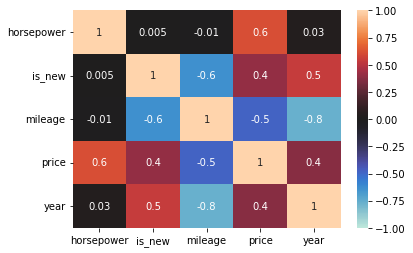

In [9]:
# Строим карту корреляции
df_num_data = df_train._get_numeric_data()  # числовые данные
df_corr = df_num_data.corr()  # коэффициенты корреляции
sns.heatmap(
    df_corr,  # датасет
    annot=True,  # вывод значений в ячейках
    fmt='.1g',  # формат значений
    vmin=-1,  # нижнее значение цветовой гаммы
    vmax=1,  # верхнее значение цветовой гаммы
    center=0,  # среднее значение цветовой гаммы
)

Видно, что из выбранных данных все хорошо коррелируют с ценой. Но можно заметить, что is_new также хорошо коррелирует с mileage и year. Тогда можно убрать параметр is_new и оставить все остальные. 

## Категориальные признаки

Построим графики распределения цены в разрезе некоторых категориальных признаков

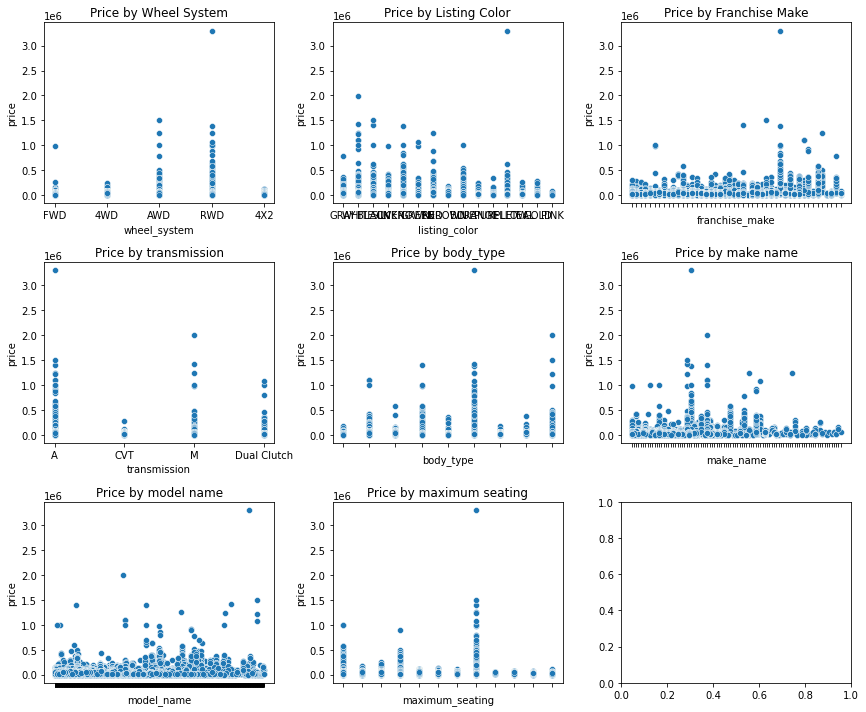

In [13]:
# Создание графической сетки с помощью Seaborn
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

# Построение графиков для каждого категориального признака
sns.scatterplot(ax=axes[0, 0], data=df_train, x='wheel_system', y='price')
axes[0, 0].set_title('Price by Wheel System')

sns.scatterplot(ax=axes[0, 1], data=df_train, x='listing_color', y='price')
axes[0, 1].set_title('Price by Listing Color')

sns.scatterplot(ax=axes[0, 2], data=df_train, x='franchise_make', y='price')
axes[0, 2].set_title('Price by Franchise Make')
axes[0, 2].set_xticklabels([])

sns.scatterplot(ax=axes[1, 0], data=df_train, x='transmission', y='price')
axes[1, 0].set_title('Price by transmission')

sns.scatterplot(ax=axes[1, 1], data=df_train, x='body_type', y='price')
axes[1, 1].set_title('Price by body_type')
axes[1, 1].set_xticklabels([])

sns.scatterplot(ax=axes[1, 2], data=df_train, x='make_name', y='price')
axes[1, 2].set_title('Price by make name')
axes[1, 2].set_xticklabels([])

sns.scatterplot(ax=axes[2,0], data=df_train, x='model_name', y='price')
axes[2, 0].set_title('Price by model name')
axes[2, 0].set_xticklabels([])

sns.scatterplot(ax=axes[2, 1], data=df_train, x='maximum_seating', y='price')
axes[2, 1].set_title('Price by maximum seating')
axes[2, 1].set_xticklabels([])


# Отображение графиков
plt.tight_layout()
plt.show()

Многие признаки не имеют никаких диапазонов цены, ее значения размазаны по всей оси, в лучшем случае они ограницены сверху.
Из представленных параметров можно взять в обучение признаки:

wheel_system  
listing_color  
transmission  
body_type  
maximum_seating  

Рассмотрим отдельно сильно заполненные графики, чтобы понять, как влияют эти параметры на цену

<AxesSubplot:xlabel='engine_cylinders', ylabel='price'>

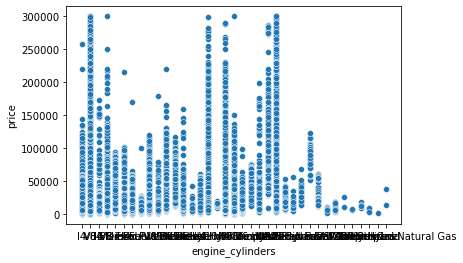

In [14]:
sns.scatterplot(
    data=df_train[df_train.price < 300_000], x='engine_cylinders', y='price'
)

Видно, что для некоторых параметров значения цены размазаны по всей оси. Значит эти праметры не имеют особого влияния на цену. Но также есть параметры, которые имеют определенный диапазон цены и не выходят за его пределы.  
То есть этот признак влияет на цену.  
Возьмем его в обучение

<AxesSubplot:xlabel='make_name', ylabel='price'>

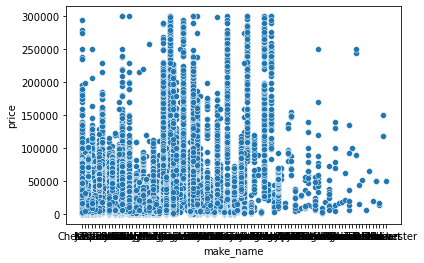

In [15]:
sns.scatterplot(
    data=df_train[df_train.price < 300_000], x='make_name', y='price'
)

<AxesSubplot:xlabel='model_name', ylabel='price'>

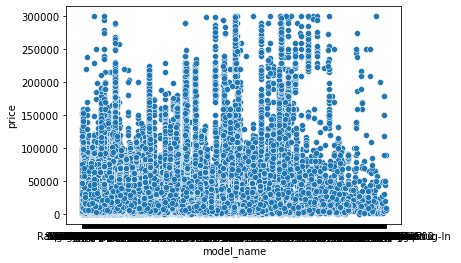

In [16]:
sns.scatterplot(
    data=df_train[df_train.price < 300_000], x='model_name', y='price'
)

<AxesSubplot:xlabel='franchise_make', ylabel='price'>

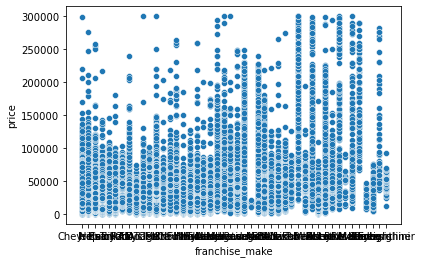

In [17]:
sns.scatterplot(
    data=df_train[df_train.price < 300_000], x='franchise_make', y='price'
)

Ситуации аналогичны предыдущему графику.

## Заполнение данных

In [18]:
df_train = pd.read_csv('train.csv', usecols=['price', 'horsepower','mileage','make_name','model_name', 'year','wheel_system', 'transmission', 'listing_color', 'body_type',
            'franchise_make','engine_cylinders', 'maximum_seating'])

In [19]:
df_train['horsepower'] = np.where(df_train['horsepower'] > 700, df_train['horsepower'].quantile(0.75), df_train['horsepower'])

In [20]:
df_train['horsepower'] = df_train.horsepower.fillna(df_train.horsepower.mean())
df_train['mileage'] = df_train.mileage.fillna(df_train.mileage.median())

In [21]:
df_train['body_type']= df_train.body_type.fillna(df_train['body_type'].mode()[0])
df_train['engine_cylinders']= df_train.engine_cylinders.fillna(df_train['engine_cylinders'].mode()[0])
df_train['franchise_make']= df_train.franchise_make.fillna(df_train['franchise_make'].mode()[0])
df_train['maximum_seating']= df_train.maximum_seating.fillna(df_train['maximum_seating'].mode()[0])
df_train['transmission']= df_train.transmission.fillna(df_train['transmission'].mode()[0])
df_train['wheel_system']= df_train.wheel_system.fillna(df_train['wheel_system'].mode()[0])

# Обучение

In [22]:
SEED = 42  # фиксируем значение ГПСЧ для воспроизводимости результатов

In [24]:
!pip install catboost

In [25]:
from catboost import Pool, CatBoostRegressor
from sklearn.model_selection import train_test_split

In [26]:
features=['body_type','engine_cylinders',
       'franchise_make', 'horsepower', 'listing_color', 'make_name',
       'maximum_seating', 'mileage', 'model_name','transmission',
       'wheel_system', 'year']
df_notna = df_train[[*features, 'price']]
X = df_notna[features]
y = df_notna.price

Разделим изначальные данные на тестовые и обучающие

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=SEED)

In [28]:
cat_features = ['body_type','engine_cylinders',
       'franchise_make','listing_color', 'make_name',
       'maximum_seating','model_name','transmission',
       'wheel_system']

In [29]:
train_data = Pool(data=X_train, label=y_train, cat_features=cat_features)

In [30]:
test_data = Pool(data=X_test, label=y_test, cat_features=cat_features)

Будем испольозовать catBoost модель, чтобы не применять one-hot кодирование для всех категориальных признаков

In [31]:
cat = CatBoostRegressor(loss_function='RMSE',
                        iterations=600,
                        learning_rate=0.08,
                        early_stopping_rounds=10,
                        depth=8
                        )

In [32]:
cat.fit(train_data,verbose=50, eval_set=test_data)

0:	learn: 17267.7236774	test: 17373.3318706	best: 17373.3318706 (0)	total: 3.9s	remaining: 38m 53s
50:	learn: 7317.7498573	test: 8031.9838937	best: 8031.9838937 (50)	total: 2m 55s	remaining: 31m 29s
100:	learn: 6641.1596053	test: 7607.2968335	best: 7607.2968335 (100)	total: 5m 40s	remaining: 28m 4s
150:	learn: 6212.8437647	test: 7333.6242254	best: 7333.6242254 (150)	total: 8m 49s	remaining: 26m 13s
200:	learn: 5922.8510823	test: 7165.9197392	best: 7165.9197392 (200)	total: 11m 46s	remaining: 23m 21s
250:	learn: 5737.1587782	test: 7084.8816684	best: 7084.8816684 (250)	total: 14m 36s	remaining: 20m 18s
300:	learn: 5590.4242439	test: 6981.8839393	best: 6981.8839393 (300)	total: 17m 24s	remaining: 17m 17s
350:	learn: 5450.2556301	test: 6914.4297814	best: 6914.4297814 (350)	total: 20m 23s	remaining: 14m 27s
400:	learn: 5324.0959222	test: 6835.5715823	best: 6835.5715823 (400)	total: 23m 24s	remaining: 11m 36s
450:	learn: 5213.5060543	test: 6758.9615433	best: 6758.9615433 (450)	total: 26m 18s

In [33]:
accuracy = cat.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8690604885115301


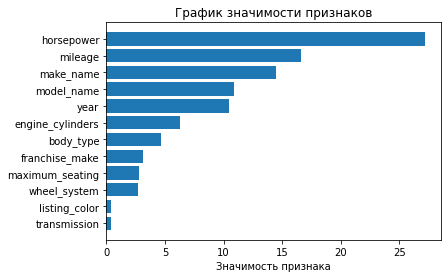

In [34]:
feature_importance = cat.get_feature_importance()
feature_names = cat.feature_names_
sorted_idx = feature_importance.argsort()

plt.barh(range(len(feature_names)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Значимость признака')
plt.title('График значимости признаков')
plt.show()

In [35]:
df_test = pd.read_csv('test.csv', usecols=['vin', *features])

In [36]:
df_submission = pd.read_csv('submission.csv')

In [37]:
df_test['horsepower'] = np.where(df_test['horsepower'] > 700, df_test['horsepower'].quantile(0.75), df_test['horsepower'])

In [38]:
df_test['horsepower'] = df_test.horsepower.fillna(df_test.horsepower.mean())
df_test['mileage'] = df_test.mileage.fillna(df_test.mileage.median())

In [39]:
df_test['body_type']= df_test.body_type.fillna(df_test['body_type'].mode()[0])
df_test['engine_cylinders']= df_test.engine_cylinders.fillna(df_test['engine_cylinders'].mode()[0])
df_test['franchise_make']= df_test.franchise_make.fillna(df_test['franchise_make'].mode()[0])
df_test['maximum_seating']= df_test.maximum_seating.fillna(df_test['maximum_seating'].mode()[0])
df_test['transmission']= df_test.transmission.fillna(df_test['transmission'].mode()[0])
df_test['wheel_system']= df_test.wheel_system.fillna(df_test['wheel_system'].mode()[0])

In [40]:
df_test.count()

vin                 525007
body_type           525007
engine_cylinders    525007
franchise_make      525007
horsepower          525007
listing_color       525007
make_name           525007
maximum_seating     525007
mileage             525007
model_name          525007
transmission        525007
wheel_system        525007
year                525007
dtype: int64

Предскажем данные по обученной модели

In [41]:
df_test['price'] = cat.predict(df_test[features])
df_test.head(2)

,vin,body_type,engine_cylinders,franchise_make,horsepower,listing_color,make_name,maximum_seating,mileage,model_name,transmission,wheel_system,year,price
0,ZACNJBB5KPJ92081,SUV / Crossover,I4,Jeep,177.0,YELLOW,Jeep,5 seats,7.0,Renegade,A,FWD,2019,21916.364102
1,SALCJFX1LH858117,SUV / Crossover,I4,Land Rover,246.0,BLACK,Land Rover,7 seats,8.0,Discovery Sport,A,AWD,2020,51353.199805


Сохраним полученные цены в новом файле

In [42]:
df_test[['vin', 'price']].to_csv('submission.csv', index=False)